# Task 5: Exploratory Data Analysis (EDA) - Titanic Dataset


## Libraries Import


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Dataset


In [3]:
df = pd.read_csv(r"C:\Users\AAFALKAZI\OneDrive\Documents\Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Count of Survivors


In [7]:
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

### Observation:
0 represents passengers who did not survive, and 1 represents passengers who survived.
Most passengers did not survive the Titanic disaster.


## Count of Passengers by Gender


In [8]:
df['Sex'].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

### Observation:
There are more male passengers than female passengers on the Titanic.
Gender distribution may affect survival analysis.


## Age Distribution of Passengers


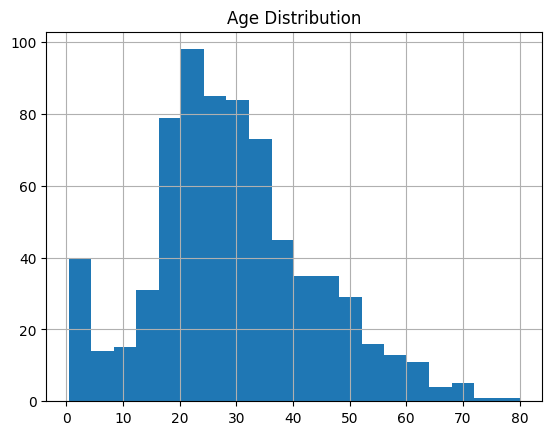

In [9]:
df['Age'].hist(bins=20)
plt.title("Age Distribution")
plt.show()


### Observation:
The histogram shows that most passengers were between 20 and 40 years old.
Very few passengers were below 10 or above 70 years.
The age distribution is slightly right-skewed.


## Fare Distribution Boxplot


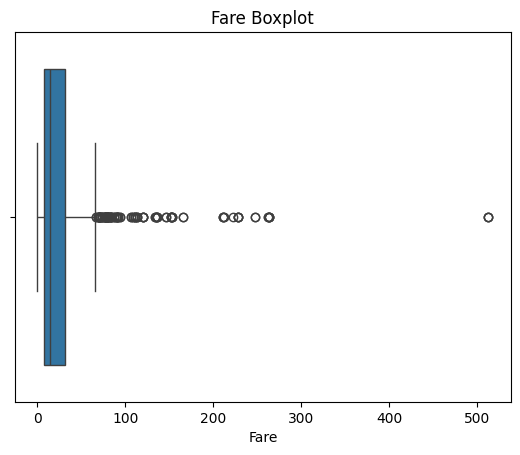

In [21]:
sns.boxplot(x=df['Fare'])
plt.title("Fare Boxplot")
plt.show()


### Observation:
The boxplot shows that fare values are highly skewed.
There are several outliers, indicating some passengers paid very high fares.
Most passengers paid lower fares.


## Survival Count by Gender


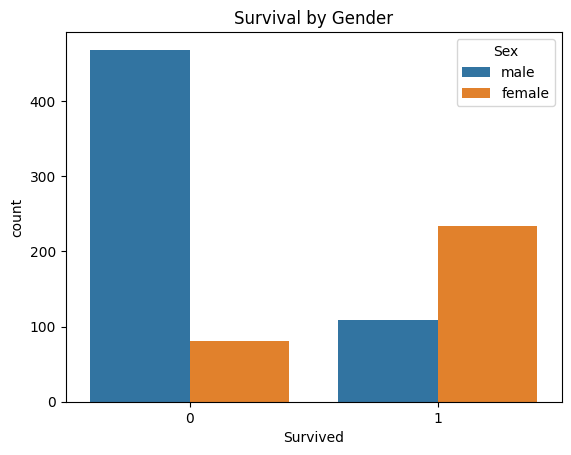

In [11]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()


### Observation:
Female passengers had a higher survival rate compared to male passengers.
Most male passengers did not survive.
Gender played an important role in survival.


## Pairplot of Key Numerical Features


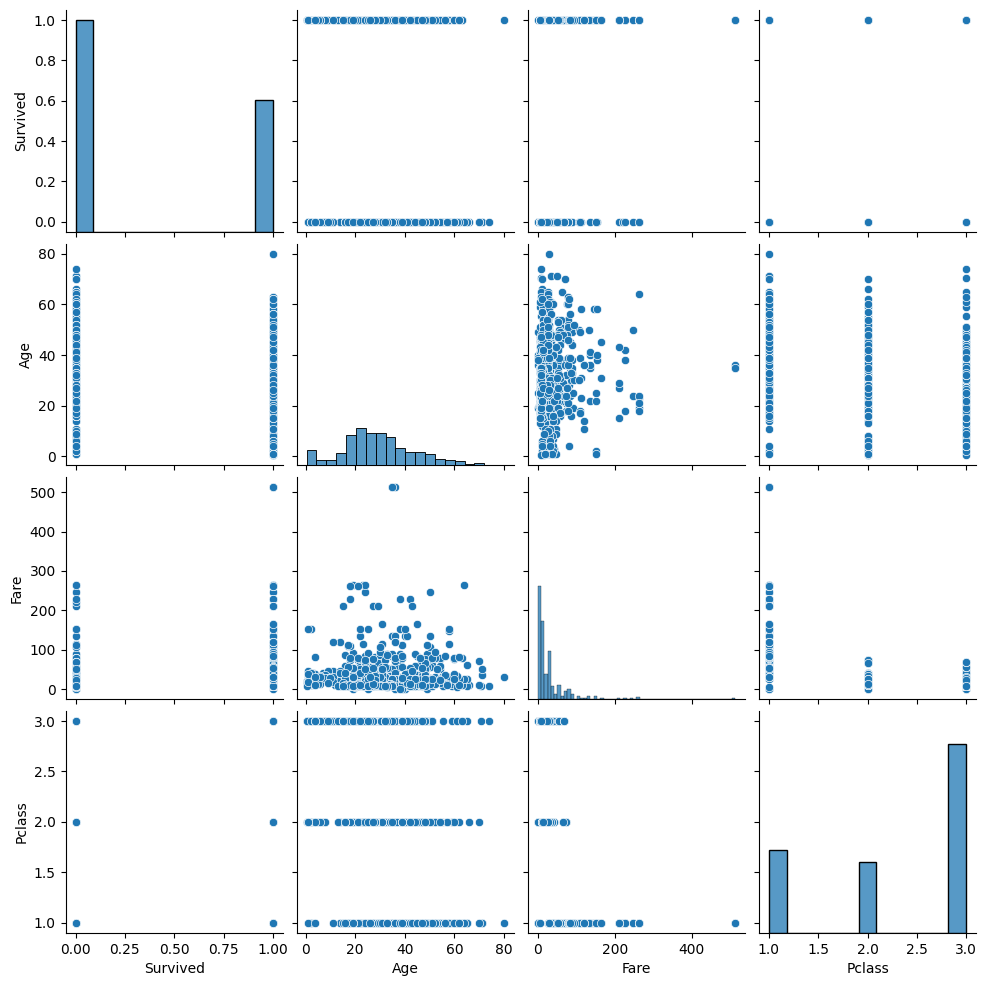

In [12]:
sns.pairplot(df[['Survived','Age','Fare','Pclass']])
plt.show()


### Observation:
The pairplot shows relationships between numerical variables.
Survival is positively related to Fare.
Passengers with higher fares had better chances of survival.


## Correlation Heatmap of Numerical Features


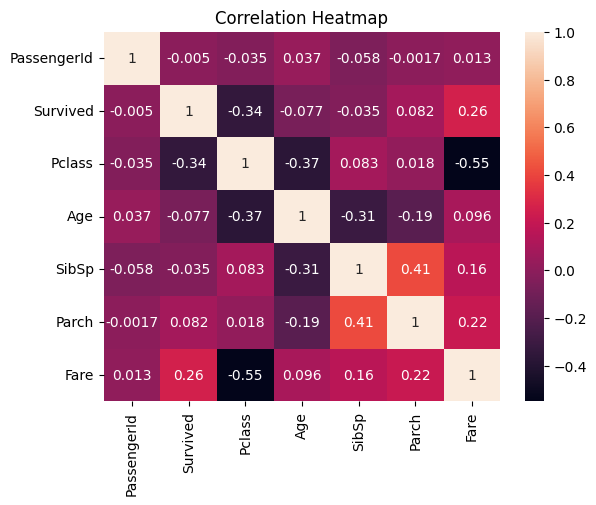

In [14]:
numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


### Observation:
The heatmap shows correlation between numerical features.
Fare has a positive correlation with survival.
Pclass has a negative correlation with survival.


## Scatterplot of Age vs Fare by Survival


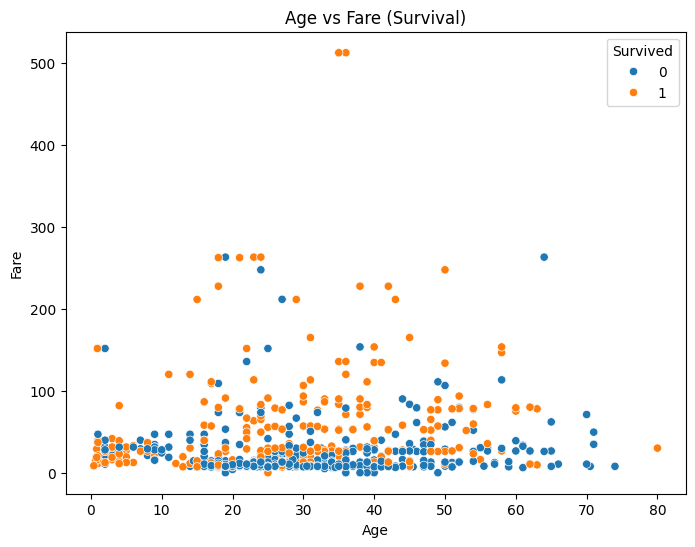

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Age',
    y='Fare',
    hue='Survived',
    data=df
)
plt.title("Age vs Fare (Survival)")
plt.show()


### Observation:
The scatterplot shows a weak relationship between Age and Fare.
Most passengers paid lower fares across all age groups.
A few high-fare outliers are visible.


## Summary 

- Female passengers had a significantly higher survival rate than male passengers.
- Passengers traveling in higher classes (Pclass 1) had better chances of survival.
- Higher fare was positively associated with survival, indicating that wealthier passengers survived more.
- Age showed a moderate impact on survival, with children having slightly better survival chances.
- Overall, gender and passenger class were the most influential factors affecting survival.
